In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!cd ./gdrive/My\ Drive ;wget nlp.stanford.edu/data/wordvecs/glove.6B.zip

--2020-02-22 06:32:18--  http://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/wordvecs/glove.6B.zip [following]
--2020-02-22 06:32:18--  https://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip [following]
--2020-02-22 06:32:19--  http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182753 (822M) [applic

In [4]:
!ls -alFh 

total 48K
drwxr-xr-x 1 root root 4.0K Feb 22 06:29 ./
drwxr-xr-x 1 root root 4.0K Feb 22 05:37 ../
drwxr-xr-x 1 root root 4.0K Feb 19 17:12 .config/
-rw-r--r-- 1 root root  27K Feb 22 05:40 example_tags.txt
drwx------ 4 root root 4.0K Feb 22 06:29 gdrive/
drwxr-xr-x 1 root root 4.0K Feb  5 18:37 sample_data/


In [5]:
!unzip ./gdrive/My\ Drive/glove.6B.zip

Archive:  ./gdrive/My Drive/glove.6B.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
  inflating: glove.6B.50d.txt        


In [6]:
!ls -alFh

total 2.1G
drwxr-xr-x 1 root root 4.0K Feb 22 06:43 ./
drwxr-xr-x 1 root root 4.0K Feb 22 05:37 ../
drwxr-xr-x 1 root root 4.0K Feb 19 17:12 .config/
-rw-r--r-- 1 root root  27K Feb 22 05:40 example_tags.txt
drwx------ 4 root root 4.0K Feb 22 06:29 gdrive/
-rw-rw-r-- 1 root root 332M Dec 22  2015 glove.6B.100d.txt
-rw-rw-r-- 1 root root 662M Dec 22  2015 glove.6B.200d.txt
-rw-rw-r-- 1 root root 990M Dec 22  2015 glove.6B.300d.txt
-rw-rw-r-- 1 root root 164M Dec 22  2015 glove.6B.50d.txt
drwxr-xr-x 1 root root 4.0K Feb  5 18:37 sample_data/


In [16]:
import gensim
gensim.scripts.glove2word2vec.glove2word2vec('glove.6B.100d.txt', 'text')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(400001, 100)

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
x = list(wn.all_synsets())

In [43]:
x = str(x)
for i in x:
    tmp += str(x[:]).split("'")[1] + '\n'

KeyboardInterrupt: ignored

 * loaded 1922 wordnet senses, 0 rejected
 * generating dataset...
 * loading wordvector model ( text )...


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


 * clustering...
 * saved results to: res_wv_k100.json


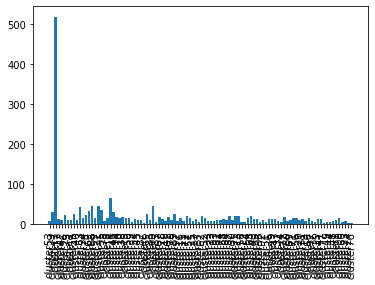

In [45]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from sklearn import cluster, datasets
import numpy as np
import json
import sys
import codecs
from nltk.corpus import wordnet
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from gensim.models import KeyedVectors

mpl.rcParams['toolbar'] = 'None'

wvmodel = None

# make False to switch to wordvectors
use_wordnet = False

modelFile = "text"

cache = {}


def _mk_synset(w):
    #
    # turn cat.n.01 into the Synset object form
    #
    word = w.strip()
    if '.' in word:
        return wordnet.synset(word)
    else:
        print(' * Error, invalid synset name', w, 'skipping...')
        return None

def _mk_wv_word(s):
    #
    # turn wordnet Synset into word2vec word form
    #   e.g. cat.n.01 -> 'cat'
    #   e.g. free_trade.n.01 -> free-trade
    return s.lemmas()[0].name().replace('_', '-')



def load_tags(filename):
    with codecs.open(filename, 'rb', 'utf-8') as tagfile:
        lines = [line for line in tagfile.readlines() if not line.startswith('#')]
        data = [_mk_synset(w) for w in lines if _mk_synset(w)]
        print(' *', 'loaded', len(data), 'wordnet senses,', len(lines) - len(data), 'rejected')
        return data

#
# wordvectors similarity distance
#

def wv(w1, w2, t):
    # lazy load the wordvector model...
    global wvmodel
    if wvmodel == None:
        print(' *', 'loading wordvector model (', modelFile, ')...')
        wvmodel = KeyedVectors.load_word2vec_format(modelFile, binary=False)
        wvmodel.init_sims(replace=True)  # no more updates, prune memory

    try:
        #
        # since we've got wordnet synset objects (like cat.n.01), we
        # must turn this back into a regular word ('cat') because the
        # word vector GloVe models are plain words with spaces turned
        # into hyphens on phrases (e.g. climate-change, black-and-white)
        #
        wv_w1, wv_w2 = _mk_wv_word(w1), _mk_wv_word(w2)
        distance = wvmodel.similarity(wv_w1, wv_w2)
        return distance if abs(distance) >= t else 0
    except:
        return 0

#
# wordnet wup similarity distance
#


def wup(w1, w2, t):
    distance = w1.wup_similarity(w2)
    if distance:
        if distance >= t:
            return distance
    return 0

#
# wordnet path similarity distancewv
#


def path(w1, w2, t):
    distance = w1.path_similarity(w2)
    if distance:
        if distance >= t:
            return distance
    return 0

#
# Normalized distance between any two words as represented
# by wordnet synsets
#


def word_to_word_distance(w1, w2, t):
    if w1 == w2:
        return 1.0
    else:
        global cache
        s = sorted([w1, w2])
        x = (s[0], s[1])
        if x in cache:
            return cache[x]
        else:
            distances = []
            if use_wordnet:
                distances.append(wup(x[0], x[1], t))
                distances.append(path(x[0], x[1], t))
            else:
                # scale threshold between wm and wv
                distances.append(wv(w1, w2, t / 2.5))
            d = sum(distances) / len(distances)
            cache[x] = d
            return d


def make_data_matrix(words, t):
    list_of_vectors = []
    for word_x in words:
        wordvector = []
        for word_y in words:
            wordvector.append(word_to_word_distance(word_x, word_y, t))
        list_of_vectors.append(wordvector)

    data = np.array(np.array(list_of_vectors))
    labels = words
    return (data, labels)


def show_histogram(d):
    c = {k: len(d[k]) for k in d.keys()}
    bars, heights = zip(*c.items())
    y_pos = range(len(bars))
    plt.bar(y_pos, heights)
    plt.xticks(y_pos, bars, rotation=90)
    plt.show()


def word_cluster(data, labels, k, show_histogram_plot=False):
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)

    # for i, label in enumerate(labels):
    #    print ' *', label, k_means.labels_[i]

    d = defaultdict(list)
    for c, l in zip(k_means.labels_, labels):
        d['cluster' + str(c)].append(l.name())

    fname = 'res'
    fname += "_wn" if use_wordnet else "_wv"
    fname += '_k' + str(k) + '.json'

    with codecs.open(fname, 'wb', 'utf-8') as outfile:
        outfile.write(json.dumps(d, indent=True))
        print(' * saved results to:', fname)
        # create histogram of cluster sizes
        if show_histogram_plot:
            show_histogram(d)


if __name__ == "__main__":

    f = "example_tags.txt"
    k = 100
    t = 0.7

    words = load_tags(f)

    print(' *', 'generating dataset...')
    data, labels = make_data_matrix(words, t)

    print(' *', 'clustering...')
    word_cluster(data, labels, k=k, show_histogram_plot=True)
